**E22CSEU0020**

**Akshat Aggarwal**

**Loading Libraries**

In [1]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

**Ques:1**

In [2]:
# Reading the data
data = pd.read_csv('diet.csv')
data.head()

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [3]:
#A)

# Select columns to normalize
columns_to_normalize = ['age', 'height', 'initial.weight', 'final.weight']

# Normalize the selected columns
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Check the normalized data
print(data.head())

   id  gender       age    height diet.type  initial.weight  final.weight
0   1  Female -1.749845 -1.038055         A       -1.803768     -1.766659
1   2  Female  0.688442  1.870818         A       -1.551307     -1.791641
2   3  Female  1.602799 -0.068430         A       -1.046385     -0.629975
3   4  Female -0.632297  0.019717         A       -1.046385     -0.904778
4   5  Female  1.094823 -0.068430         A       -0.920154     -0.767377


In [4]:
#B)

# Calculating the difference between final and initial weight
data['weight_difference'] = data['final.weight'] - data['initial.weight']

# Perform ANOVA
anova_result = f_oneway(data['weight_difference'][data['diet.type'] == 'A'],
                        data['weight_difference'][data['diet.type'] == 'B'])

# Print ANOVA result
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 0.00766401862142607
p-value: 0.9306107466502493


In [5]:
#C)

alpha = 0.05

if anova_result.pvalue < alpha:
    print("F-statistic is significant")
else:
    print("F-statistic is not significant")


F-statistic is not significant, fail to reject null hypothesis


**Ques:2**

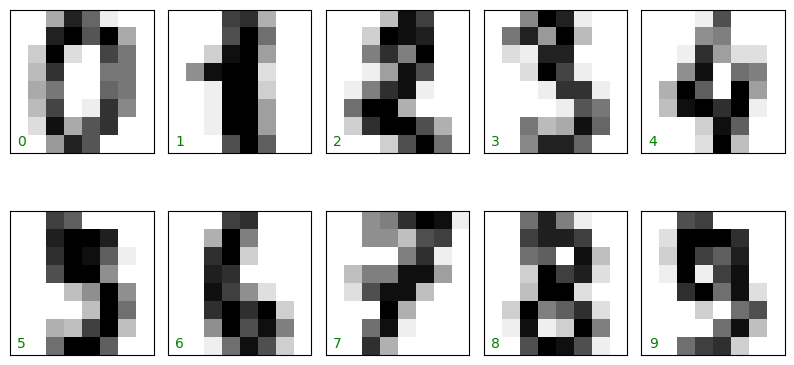

In [6]:
#A)

# Load digits dataset
digits = load_digits()

# Plotting some digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

plt.show()

In [8]:
#B)

# Get data and labels
data_and_labels = digits.data, digits.target
X, y = data_and_labels

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#C)

# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,),
                    activation='relu',
                    solver='adam',
                    batch_size=10,
                    learning_rate_init=0.09,
                    max_iter=10,
                    random_state=42)

# Training the model
mlp.fit(X_train[:50000], y_train[:50000])

# Evaluating the model
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.08444444444444445


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
